#### Author: Rudransh Jaiswal
## Linear Regression (L2 - regularised)

### Linear Regression: 

$\begin{align} y_{i} = w^{T} \phi(x_{i})\quad;\; x\epsilon\mathbb{R}^{d}, \; \phi : \mathbb{R}^{d} \rightarrow \mathbb{R}^{d\,'}, \;\phi(x)\epsilon \mathbb{R}^{d{'}}, \;  w\epsilon \mathbb{R}^{d{'}} \end{align}$

$\begin{align} Y = \Phi w \quad;\; Y\epsilon \mathbb{R}^{n},\; \Phi \epsilon \mathbb{R}^{nxd{'}}\end{align}$
(feature matrix)
- The objective to be minimised is:

$\begin{align} \mathscr{L}(w) = \frac{1}{2}||Y-\Phi w||^{2} + \frac{\lambda}{2} ||w||^{2}\end{align}$

Take Gradient of the objective:

$\begin{align} \nabla_{w} \mathscr{L}(w) = \Phi^{T}(\Phi w - Y) + \lambda w \end{align}$

on equating it to zero:

$\begin{align} (\Phi^{T}\Phi + \lambda I) w^{*} = \Phi^{T}Y \end{align}$

$\begin{align} w^{*} = (\Phi^{T}\Phi + \lambda I)^{-1}\Phi^{T}Y \end{align}$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# feature transformation to higher degree, assuming x ∈ R
def phi(x,deg):
    phi=[]
    for d in range(deg+1): phi.append(x**d)
    return phi
def genPhi(X,deg): 
    Phi=[]
    for x in X: Phi.append(phi(x,deg))
    return np.array(Phi)
    
def linReg(Phi,Y,l): # returns w
    a = np.matmul(Phi.T, Phi) + l*np.identity(len(Phi[0]))
    ainv=np.linalg.inv(a)
    b= np.matmul(Phi.T, Y)
    return np.matmul(ainv,b)

def predict(w,Phi_test):
    return np.matmul(Phi_test,w)
    

In [3]:
X=np.linspace(-5,5,100)
y=[]
for x in X: y.append(-5*x**3 + 3*x**2 + 2*x + 2 + 10*np.random.random())
y=np.array(y)
y=y.reshape((-1,1))

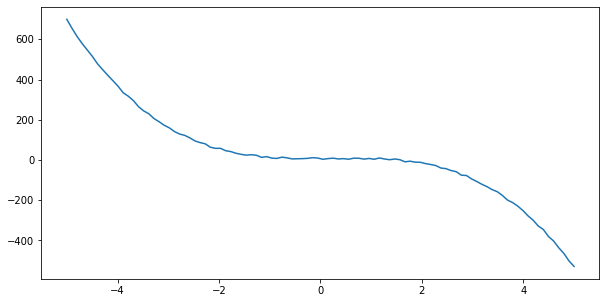

In [4]:
fig,axes=plt.subplots(figsize=(10,5),nrows=1)
axes.plot(X,y)
plt.show()

In [5]:
X_tr2, X_tst2, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=31)
Phi_total=genPhi(X,2)
Phi_tr2=genPhi(X_tr2,2)
Phi_tst2=genPhi(X_tst2,2)
w2=linReg(Phi_tr2,y_train,0)
w2_regul=linReg(Phi_tr2,y_train,1e+4)
y2pred=predict(w2,Phi_total)
y2pred_regul=predict(w2_regul,Phi_total)


X_tr3, X_tst3, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=31)
Phi_total=genPhi(X,3)
Phi_tr3=genPhi(X_tr3,3)
Phi_tst3=genPhi(X_tst3,3)

w3=linReg(Phi_tr3,y_train,0)
w3_regul=linReg(Phi_tr3,y_train,1e+5)

y3pred=predict(w3,Phi_total)
y3pred_regul=predict(w3_regul,Phi_total)


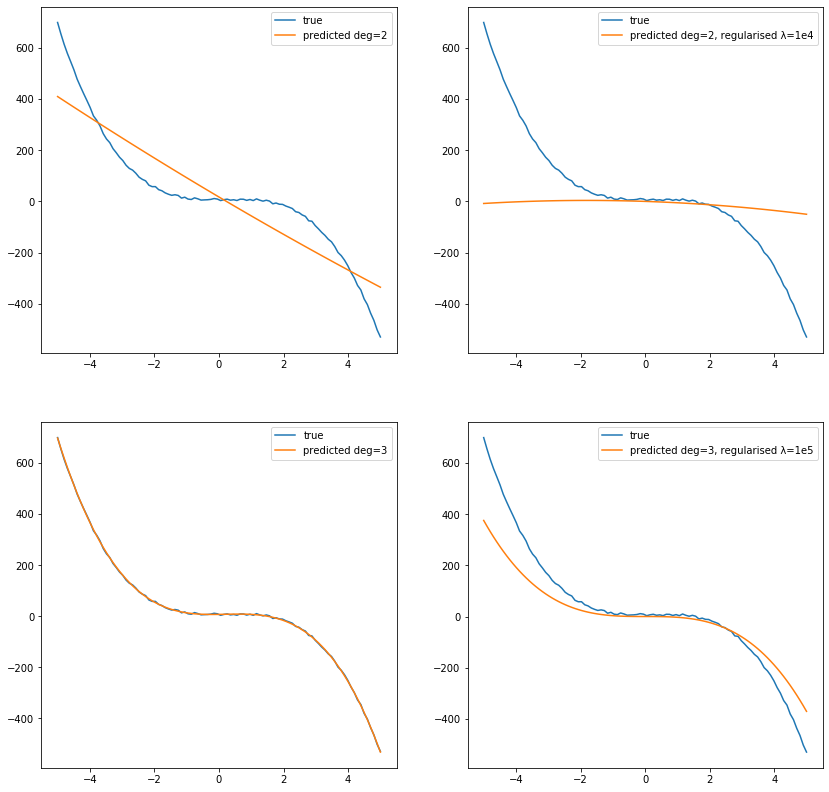

In [6]:
fig,axes=plt.subplots(figsize=(14,14),nrows=2,ncols=2)
ax=axes[0][0]
ax.plot(X,y,label='true')
ax.plot(X,y2pred,label='predicted deg=2')
ax.legend(loc=1)
ax=axes[0][1]
ax.plot(X,y,label='true')
ax.plot(X,y2pred_regul,label='predicted deg=2, regularised λ=1e4')
ax.legend(loc=1)

ax=axes[1][0]
ax.plot(X,y,label='true')
ax.plot(X,y3pred,label='predicted deg=3')
ax.legend(loc=1)
ax=axes[1][1]
ax.plot(X,y,label='true')
ax.plot(X,y3pred_regul,label='predicted deg=3, regularised λ=1e5')
ax.legend(loc=1)
plt.show()